# Genres that yield highest net profit

brief description

## import the data

In [91]:
#necessary imports

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob

In [74]:
#converts tsv files

tsv_file = './zippedData/rt.movie_info.tsv.gz'
convert = pd.read_table(tsv_file, delimiter='\t')
convert.to_csv('./zippedData/rt.movie_info.csv.gz')

tsv_file_r = './zippedData/rt.reviews.tsv.gz'
convert_r = pd.read_table(tsv_file_r, delimiter='\t', encoding = 'unicode_escape')
convert_r.to_csv('./zippedData/rt.reviews.csv.gz')

In [75]:
#importing data using glob

datafiles = glob("./zippedData/*.csv.gz")
datafiles

['./zippedData/rt.reviews.csv.gz',
 './zippedData/imdb.title.crew.csv.gz',
 './zippedData/rt.movie_info.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [76]:
datafiles_dict = {}
for filename in datafiles:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".gz", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename)
    datafiles_dict[filename_cleaned] = filename_df

In [77]:
print(datafiles_dict.keys())

dict_keys(['rt_reviews', 'imdb_title_crew', 'rt_movie_info', 'tmdb_movies', 'imdb_title_akas', 'imdb_name_basics', 'imdb_title_basics', 'tn_movie_budgets', 'bom_movie_gross', 'imdb_title_principals'])


## Overall, what are the top 5 grossing films?

In [80]:
code here JOE

SyntaxError: invalid syntax (<ipython-input-80-8762240503a6>, line 1)

***Findings***: write summary here

### If available, what are the genres of those top 5 grossing films? 

In [81]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT primary_title as Movie, runtime_minutes, genre_action, genre_adult,
genre_adventure, genre_animation, genre_biography, genre_comedy, 
genre_crime, genre_documentary, genre_drama, genre_family, genre_fantasy, 
genre_gameshow, genre_history, genre_horror, genre_music, genre_musical, 
genre_mystery, genre_news, genre_realitytv, genre_romance, genre_scifi, 
genre_short, genre_sport, genre_talkshow, genre_thriller, genre_war, genre_western
FROM imdb_title_basics
WHERE (primary_title like '%Star Wars%') & (primary_title like '%Force Awakens%') 
& (runtime_minutes IS NOT NULL) OR (primary_title == 'Avatar') OR 
(primary_title == 'Black Panther') OR (primary_title like '%Infinity War%') & 
(primary_title like '%Avengers%') OR (primary_title == 'Titanic')
ORDER BY primary_title
;
""")

pd.set_option('display.max_columns', None)
dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft.head()

,Movie,runtime_minutes,genre_action,genre_adult,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,genre_gameshow,genre_history,genre_horror,genre_music,genre_musical,genre_mystery,genre_news,genre_realitytv,genre_romance,genre_scifi,genre_short,genre_sport,genre_talkshow,genre_thriller,genre_war,genre_western
0,Avatar,93.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Avengers: Infinity War,149.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Black Panther,134.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Star Wars: Episode VII - The Force Awakens,136.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Titanic,115.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***Findings***: Leveraged the [imdb_title_basics] dataset to find the titles from top 5 grossing films and noted identified genres for each film. The genres include action, adventure, fantasy, horror, sci-fi and family

## Top 5 grossing films by year

### What are the titles of the films?

In [22]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT 
  DISTINCT year, domestic_gross, movie
FROM tn_movie_budgets 
ORDER BY domestic_gross DESC
;
""")

dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft.head()

,year,domestic_gross,movie
0,2015,936662225,Star Wars Ep. VII: The Force Awakens
1,2009,760507625,Avatar
2,2018,700059566,Black Panther
3,2018,678815482,Avengers: Infinity War
4,1997,659363944,Titanic


***Findings***: The movie budget dataset shows us that two of the top five grossing films were released in 2018 and range back to 1997.

### What was the production cost?

In [23]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT 
  DISTINCT year, production_budget, movie
FROM tn_movie_budgets 
ORDER BY domestic_gross DESC
;
""")

dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft.head()

,year,production_budget,movie
0,2015,306000000,Star Wars Ep. VII: The Force Awakens
1,2009,425000000,Avatar
2,2018,200000000,Black Panther
3,2018,300000000,Avengers: Infinity War
4,1997,200000000,Titanic


***Findings***: The data show that the lowest budget spanned 20 years between productions at a constant $200 million and ranges to $425 million for the most expensive budget.

### What was the runtime?

In [88]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT primary_title as Movie, runtime_minutes
FROM imdb_title_basics
WHERE (primary_title like '%Star Wars%') & (primary_title like '%Force Awakens%') 
& (runtime_minutes IS NOT NULL) OR (primary_title == 'Avatar') OR 
(primary_title == 'Black Panther') OR (primary_title like '%Infinity War%') & 
(primary_title like '%Avengers%') OR (primary_title == 'Titanic') & (runtime_minutes IS NOT NULL)
ORDER BY runtime_minutes
;
""")


dft = pd.DataFrame(cur.fetchall())
dft.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())

dft

,Movie,runtime_minutes
0,Avatar,93.0
1,Titanic,115.0
2,Black Panther,134.0
3,Star Wars: Episode VII - The Force Awakens,136.0
4,Avengers: Infinity War,149.0


***Findings***: From the IMDB dataset, we can see that the movies ranged in runtime from 93 — 149 minutes.

## Most recently, what has been the average production cost? 

In [ ]:
code here: JOE

***Findings***: write summary here >> [tn_movie_budgets]: use median of production_budget

## Which 5 genres had the highest box office revenue?

In the Rotten Tomatoes dataset, Is there a common genre associated with highest box office revenue?

In [117]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT rating, box_office, genre_action, genre_adventure, genre_animation, genre_classics, 
genre_comedy, genre_documentary, genre_drama, 
genre_horror, genre_international, genre_kids, 
genre_muscial, genre_mystery, genre_scifi, 
genre_spirituality, genre_sports, genre_romance,
genre_television, genre_western
FROM rt_reviews
JOIN rt_movie_info
USING('pid')  
ORDER BY box_office DESC
LIMIT 5;""")

pd.set_option('display.max_columns', None)
dfgBox = pd.DataFrame(cur.fetchall())
dfgBox.columns = (x[0] for x in cur.description)
#print(dft.shape)
#print(dft.info())
dfgBox

,rating,box_office,genre_action,genre_adventure,genre_animation,genre_classics,genre_comedy,genre_documentary,genre_drama,genre_horror,genre_international,genre_kids,genre_muscial,genre_mystery,genre_scifi,genre_spirituality,genre_sports,genre_romance,genre_television,genre_western
0,3/4,368000000.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2.5/5,303001229.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,299300000.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3.5/4,279167575.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,B-,261835892.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


***Findings***: Films with the highest box office revenue are primarily distributed within the action, adventure, comedy, kids, mystery, sci-fi and drama genres

## Data Visualization

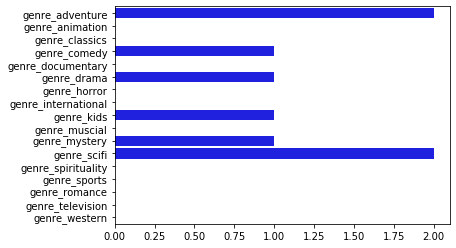

In [136]:
conn = sqlite3.connect('movie.db') 
cur = conn.cursor()

cur.execute(""" 
SELECT rating, box_office, genre_action, genre_adventure, genre_animation, genre_classics, 
genre_comedy, genre_documentary, genre_drama, 
genre_horror, genre_international, genre_kids, 
genre_muscial, genre_mystery, genre_scifi, 
genre_spirituality, genre_sports, genre_romance,
genre_television, genre_western
FROM rt_reviews
JOIN rt_movie_info
USING('pid')  
ORDER BY box_office DESC
LIMIT 5;""")

dfgBox = pd.DataFrame(cur.fetchall())
dfgBox.columns = (x[0] for x in cur.description)
#dfgBoxList = dfgBox.values.tolist()
cols = list(dfgBox.columns)
genre_cols = cols[3:]
genre_count = {}
for col in genre_cols:
    count = np.sum(dfgBox[col] != '0').sum() 
    genre_count[col] = count
    
genre_count   

keys = list(genre_count.keys())
values = list(genre_count.values())

sns.barplot(y = keys, x = values, color = 'blue')

***Findings***: write summary here